# Titanic Data Analysis (from Kaggle)

The workbook below shows a short project that analyzed the data from the Titanic dataset on the [Kaggle website](https://www.kaggle.com/c/titanic).  The goal of the project was to extract some insight on the demographics of passengers on the ship and the survival rates. 

In this project, I used the Pandas library and used Seaborn to visualize the data. While the primary goal was to analyze the data, I used this project to get comfortable with munging the data and visualizing the data at the same time.  Some of the insights found from this project is included below. 

In a follow-up project, I will take the data, and use a train-test-split to divide up the data and use a machine learning model, like logistic regression, to quantitatively find the best predictor of survival. 

### What is the relationship between people who survived and where the embarked onto the ship? Is there one city that has a higher percentage of survivors than others?

From the data, passengers from Southampton had the lowest rate of survival at 34% even though most of the passengers boarded from Southampton.  Passengers who have the highest rate of survival were from Cherbourg at nearly 50%.  The survival rate from passengers from Queenstown was 44%.  

### What is the relationship between people who survived and their passenger class on the ship? Did more first-class passengers survive over the second- and third-class passengers?

From the data, nearly 58% of all of the first class passengers survived, compared to 42% of those in second class and 27% of those in third class.  Interestingly, even though most of the passengers were in third class, they were the smallest group of passengers that survived. 

### What is the relationship between the gender of the passengers and their survival rate? Did more females survive compared to males?

Overall, females had a higher survival rate compared to men.  From the data, 82% of the females on the ship survived while only 13% of the males survived.  In addition, almost 97% of the females in first class survived, followed by 94% of the females in second class and 67% of the females in third class.

***

In [1]:
#Standard Imports 

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
#Reference datasets 

train_url = 'http://bit.ly/titanic-001'
test_url = 'http://bit.ly/titanic-002'
survive_url = 'http://bit.ly/titanic-003'

In [3]:
#Load datasets into Pandas dataframes

df_train = pd.read_csv(train_url)
df_test = pd.read_csv(test_url)
df_survive = pd.read_csv(survive_url)

In [4]:
#Combine df_test and df_survive using an inner join on 'PassengerId'

test_combined_df = pd.merge(df_test, df_survive, on='PassengerId', how='inner')
test_combined_df.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Survived
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q,0
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S,1
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q,0
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S,0
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S,1


In [5]:
#Combine the newly formed dataframe and df_train

df = test_combined_df.append(df_train)

In [6]:
#Display head of df_combined.

df.head(10)

,Age,Cabin,Embarked,Fare,Name,Parch,PassengerId,Pclass,Sex,SibSp,Survived,Ticket
0,34.5,NaN,Q,7.8292,"Kelly, Mr. James",0,892,3,male,0,0,330911
1,47.0,NaN,S,7.0000,"Wilkes, Mrs. James (Ellen Needs)",0,893,3,female,1,1,363272
2,62.0,NaN,Q,9.6875,"Myles, Mr. Thomas Francis",0,894,2,male,0,0,240276
3,27.0,NaN,S,8.6625,"Wirz, Mr. Albert",0,895,3,male,0,0,315154
4,22.0,NaN,S,12.2875,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",1,896,3,female,1,1,3101298
5,14.0,NaN,S,9.2250,"Svensson, Mr. Johan Cervin",0,897,3,male,0,0,7538
6,30.0,NaN,Q,7.6292,"Connolly, Miss. Kate",0,898,3,female,0,1,330972
7,26.0,NaN,S,29.0000,"Caldwell, Mr. Albert Francis",1,899,2,male,1,0,248738
8,18.0,NaN,C,7.2292,"Abrahim, Mrs. Joseph (Sophie Halaut Easu)",0,900,3,female,0,1,2657
9,21.0,NaN,S,24.1500,"Davies, Mr. John Samuel",0,901,3,male,2,0,A/4 48871


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1309 entries, 0 to 890
Data columns (total 12 columns):
Age            1046 non-null float64
Cabin          295 non-null object
Embarked       1307 non-null object
Fare           1308 non-null float64
Name           1309 non-null object
Parch          1309 non-null int64
PassengerId    1309 non-null int64
Pclass         1309 non-null int64
Sex            1309 non-null object
SibSp          1309 non-null int64
Survived       1309 non-null int64
Ticket         1309 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 132.9+ KB


In [8]:
# Assume that age of the NaN entires is equal to the mean of the data set.

df['Age'].fillna(df['Age'].mean(), inplace=True)

In [9]:
# Assume that the fare of the NaN entires is equal to the mean of the data set.
df['Fare'].fillna(df['Fare'].mean(), inplace=True)

In [10]:
df['Embarked'].fillna(df['Embarked'] == 'S', inplace=True)

In [11]:
df['Embarked'] = df['Embarked'].replace({'C': 'Cherbourg', 'Q': 'Queenstown', 'S': 'Southampton'})

In [12]:
df.set_value(61, 'Embarked', 'Southampton')
df.set_value(829, 'Embarked', 'Southampton')

,Age,Cabin,Embarked,Fare,Name,Parch,PassengerId,Pclass,Sex,SibSp,Survived,Ticket
0,34.500000,NaN,Queenstown,7.8292,"Kelly, Mr. James",0,892,3,male,0,0,330911
1,47.000000,NaN,Southampton,7.0000,"Wilkes, Mrs. James (Ellen Needs)",0,893,3,female,1,1,363272
2,62.000000,NaN,Queenstown,9.6875,"Myles, Mr. Thomas Francis",0,894,2,male,0,0,240276
3,27.000000,NaN,Southampton,8.6625,"Wirz, Mr. Albert",0,895,3,male,0,0,315154
4,22.000000,NaN,Southampton,12.2875,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",1,896,3,female,1,1,3101298
5,14.000000,NaN,Southampton,9.2250,"Svensson, Mr. Johan Cervin",0,897,3,male,0,0,7538
6,30.000000,NaN,Queenstown,7.6292,"Connolly, Miss. Kate",0,898,3,female,0,1,330972
7,26.000000,NaN,Southampton,29.0000,"Caldwell, Mr. Albert Francis",1,899,2,male,1,0,248738
8,18.000000,NaN,Cherbourg,7.2292,"Abrahim, Mrs. Joseph (Sophie Halaut Easu)",0,900,3,female,0,1,2657
9,21.000000,NaN,Southampton,24.1500,"Davies, Mr. John Samuel",0,901,3,male,2,0,A/4 48871


In [13]:
df123 = df[['Embarked', 'Sex']].groupby(['Embarked', 'Sex'])['Sex'].count().unstack()

In [14]:
type(df123)

pandas.core.frame.DataFrame

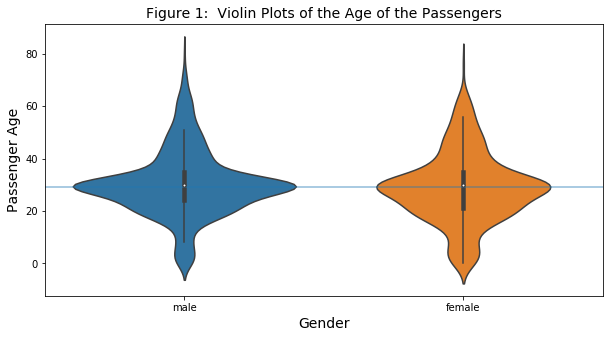

In [15]:
plt.figure(figsize = (10, 5))
sns.violinplot(x = df['Sex'], y=df['Age'])
plt.xlabel('Gender', fontsize = 14)
plt.ylabel('Passenger Age', fontsize = 14)
plt.axhline(y = 29, alpha = 0.5)
plt.title('Figure 1:  Violin Plots of the Age of the Passengers', fontsize = 14)
plt.show()

### Finding 2:  A majority of the passengers on the ship are between 20-30 years of age (Figure 2).

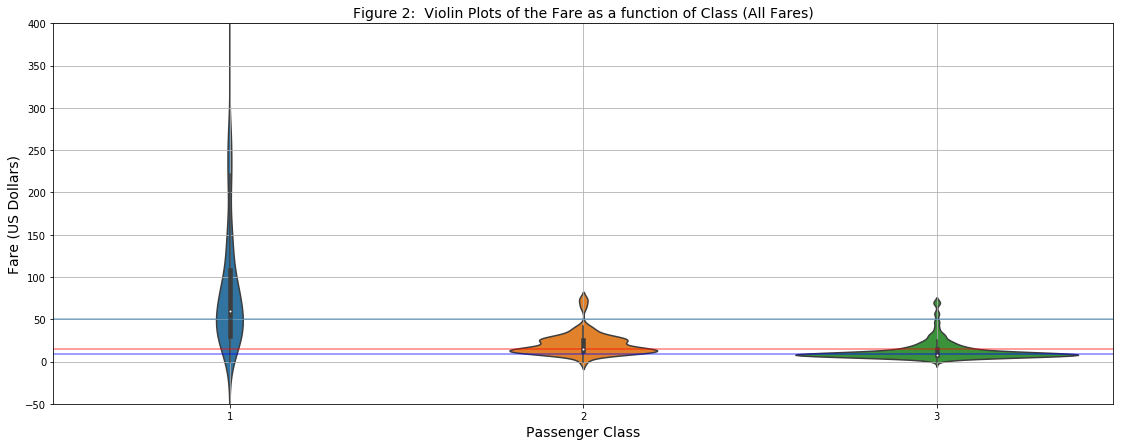

In [16]:
#df = df[df['Fare'] < 300]
plt.figure(figsize = (19, 7))
sns.violinplot(x = df['Pclass'], y=df["Fare"])
plt.xlabel('Passenger Class', fontsize = 14)
plt.ylabel('Fare (US Dollars)', fontsize = 14)
plt.ylim(-50, 400, 25)
plt.axhline(y = 50, alpha = 0.5)
plt.axhline(y = 15, color = 'r', alpha = 0.5)
plt.axhline(y = 9, color = 'b', alpha = 0.5)
plt.title('Figure 2:  Violin Plots of the Fare as a function of Class (All Fares)', fontsize = 14)
plt.grid(True)
plt.show()

In [17]:
sex_count_embarked = df[['Embarked', 'Sex']].groupby(['Embarked'], as_index = False).count()
sex_count_embarked

,Embarked,Sex
0,Cherbourg,270
1,Queenstown,123
2,Southampton,916


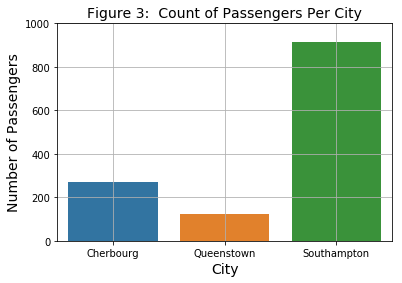

In [18]:
sns.barplot(sex_count_embarked['Embarked'], sex_count_embarked['Sex'])
plt.grid(True)
plt.ylim(0, 1000, 100)
plt.xlabel('City', fontsize = 14)
plt.ylabel('Number of Passengers', fontsize = 14)
plt.title('Figure 3:  Count of Passengers Per City', fontsize = 14)
plt.show()

In [19]:
count_pclass = df[['Embarked', 'Pclass']].groupby(['Pclass'], as_index = False).count()
count_pclass

,Pclass,Embarked
0,1,323
1,2,277
2,3,709


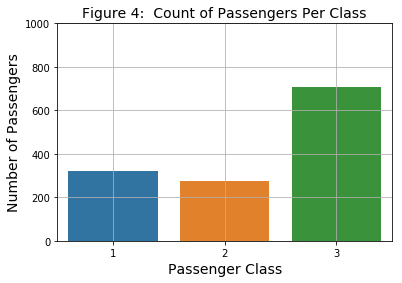

In [20]:
sns.barplot(count_pclass['Pclass'], count_pclass['Embarked'])
plt.grid(True)
plt.ylim(0, 1000, 100)
plt.xlabel('Passenger Class', fontsize = 14)
plt.ylabel('Number of Passengers', fontsize = 14)
plt.title('Figure 4:  Count of Passengers Per Class', fontsize = 14)
plt.show()

In [21]:
gender_survival_df = df[['Sex', 'Survived']].groupby(['Sex'], as_index = False).mean()
gender_survival_df

,Sex,Survived
0,female,0.82618
1,male,0.12930


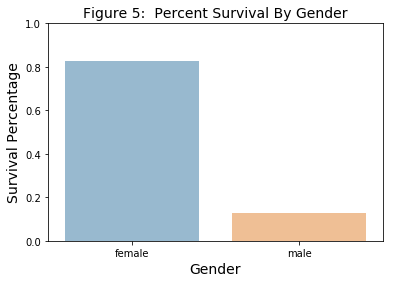

In [22]:
sns.barplot(x = 'Sex', y = 'Survived', data = gender_survival_df, alpha = 0.5)
plt.ylim(0, 1, 0.1)
plt.title('Figure 5:  Percent Survival By Gender', fontsize = 14)
plt.xlabel('Gender', fontsize = 14)
plt.ylabel('Survival Percentage', fontsize = 14)
plt.show()

In [23]:
df['Survived'].mean()

0.37738731856378915

In [24]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1309 entries, 0 to 890
Data columns (total 12 columns):
Age            1309 non-null float64
Cabin          295 non-null object
Embarked       1309 non-null object
Fare           1309 non-null float64
Name           1309 non-null object
Parch          1309 non-null int64
PassengerId    1309 non-null int64
Pclass         1309 non-null int64
Sex            1309 non-null object
SibSp          1309 non-null int64
Survived       1309 non-null int64
Ticket         1309 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 172.9+ KB


In [25]:
df.head()

,Age,Cabin,Embarked,Fare,Name,Parch,PassengerId,Pclass,Sex,SibSp,Survived,Ticket
0,34.5,NaN,Queenstown,7.8292,"Kelly, Mr. James",0,892,3,male,0,0,330911
1,47.0,NaN,Southampton,7.0000,"Wilkes, Mrs. James (Ellen Needs)",0,893,3,female,1,1,363272
2,62.0,NaN,Queenstown,9.6875,"Myles, Mr. Thomas Francis",0,894,2,male,0,0,240276
3,27.0,NaN,Southampton,8.6625,"Wirz, Mr. Albert",0,895,3,male,0,0,315154
4,22.0,NaN,Southampton,12.2875,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",1,896,3,female,1,1,3101298


In [26]:
df['SibSp'].value_counts()

0    891
1    319
2     42
4     22
3     20
8      9
5      6
Name: SibSp, dtype: int64

In [27]:
df['Parch'].value_counts()

0    1002
1     170
2     113
3       8
5       6
4       6
9       2
6       2
Name: Parch, dtype: int64

In [28]:
def parents_replace(c):
    if c['Parch'] == 0:
        return 'Traveling Without Parents'
    else:
        return 'Traveling With Parents'

In [29]:
def sibling_replace(c):
    if c['SibSp'] == 0:
        return 'Traveling Without Siblings'
    else:
        return 'Traveling With Siblings'

In [30]:
df['Travel_w_ Parents'] = df.apply(parents_replace, axis=1)

In [31]:
df['Travel_w_ Siblings'] = df.apply(sibling_replace, axis=1)

In [32]:
df['Fare'].describe()

count    1309.000000
mean       33.295479
std        51.738879
min         0.000000
25%         7.895800
50%        14.454200
75%        31.275000
max       512.329200
Name: Fare, dtype: float64

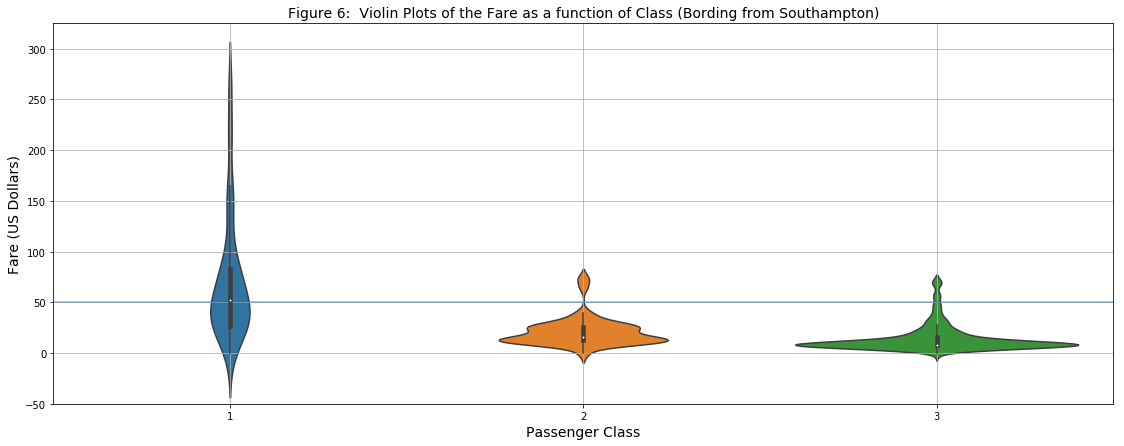

In [33]:
df_south = df[df['Embarked'] == 'Southampton']
plt.figure(figsize = (19, 7))
sns.violinplot(x = df_south['Pclass'], y=df_south["Fare"])
plt.xlabel('Passenger Class', fontsize = 14)
plt.ylabel('Fare (US Dollars)', fontsize = 14)
plt.ylim(-50, 325, 25)
plt.axhline(y = 50, alpha = 0.5)
plt.title('Figure 6:  Violin Plots of the Fare as a function of Class (Bording from Southampton)', fontsize = 14)
plt.grid(True)
plt.show()

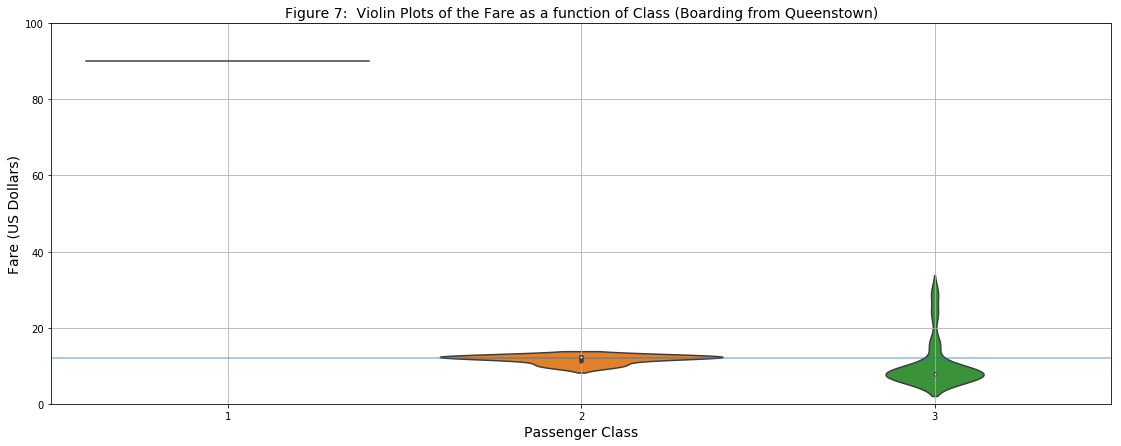

In [34]:
df_queen = df[df['Embarked'] == 'Queenstown']
plt.figure(figsize = (19, 7))
sns.violinplot(x = df_queen['Pclass'], y=df_queen["Fare"])
plt.xlabel('Passenger Class', fontsize = 14)
plt.ylabel('Fare (US Dollars)', fontsize = 14)
plt.ylim(0, 100, 25)
plt.axhline(y = 12, alpha = 0.5)
plt.title('Figure 7:  Violin Plots of the Fare as a function of Class (Boarding from Queenstown)', fontsize = 14)
plt.grid(True)
plt.show()

In [35]:
df[(df['Embarked'] == 'Queenstown') & (df['Pclass'] == 1)]

,Age,Cabin,Embarked,Fare,Name,Parch,PassengerId,Pclass,Sex,SibSp,Survived,Ticket,Travel_w_ Parents,Travel_w_ Siblings
411,37.0,C78,Queenstown,90.0,"Minahan, Mrs. William Edward (Lillian E Thorpe)",0,1303,1,female,1,1,19928,Traveling Without Parents,Traveling With Siblings
245,44.0,C78,Queenstown,90.0,"Minahan, Dr. William Edward",0,246,1,male,2,0,19928,Traveling Without Parents,Traveling With Siblings
412,33.0,C78,Queenstown,90.0,"Minahan, Miss. Daisy E",0,413,1,female,1,1,19928,Traveling Without Parents,Traveling With Siblings


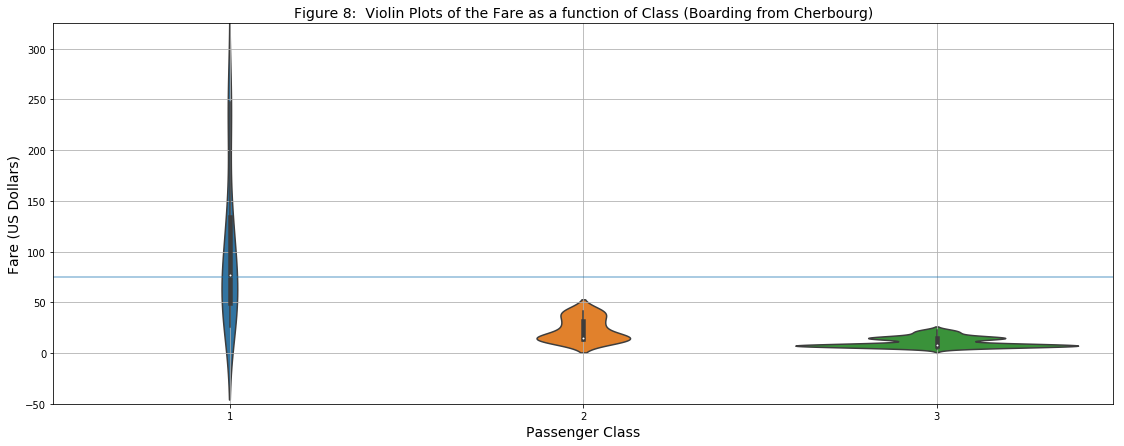

In [36]:
df_cherbourg = df[df['Embarked'] == 'Cherbourg']
plt.figure(figsize = (19, 7))
sns.violinplot(x = df_cherbourg['Pclass'], y=df_cherbourg["Fare"])
plt.xlabel('Passenger Class', fontsize = 14)
plt.ylabel('Fare (US Dollars)', fontsize = 14)
plt.ylim(-50, 325, 25)
plt.axhline(y = 75, alpha = 0.5)
plt.title('Figure 8:  Violin Plots of the Fare as a function of Class (Boarding from Cherbourg)', fontsize = 14)
plt.grid(True)
plt.show()

In [37]:
bins = [0, 7.89, 14.45, 31.27, 512.32]
group_names = ['Low', 'Below Average', 'Above Average', 'High']

In [38]:
categories = pd.cut(df['Fare'], bins, labels=group_names)
df['FareCategories'] = pd.cut(df['Fare'], bins, labels=group_names)
df.head()

,Age,Cabin,Embarked,Fare,Name,Parch,PassengerId,Pclass,Sex,SibSp,Survived,Ticket,Travel_w_ Parents,Travel_w_ Siblings,FareCategories
0,34.5,NaN,Queenstown,7.8292,"Kelly, Mr. James",0,892,3,male,0,0,330911,Traveling Without Parents,Traveling Without Siblings,Low
1,47.0,NaN,Southampton,7.0000,"Wilkes, Mrs. James (Ellen Needs)",0,893,3,female,1,1,363272,Traveling Without Parents,Traveling With Siblings,Low
2,62.0,NaN,Queenstown,9.6875,"Myles, Mr. Thomas Francis",0,894,2,male,0,0,240276,Traveling Without Parents,Traveling Without Siblings,Below Average
3,27.0,NaN,Southampton,8.6625,"Wirz, Mr. Albert",0,895,3,male,0,0,315154,Traveling Without Parents,Traveling Without Siblings,Below Average
4,22.0,NaN,Southampton,12.2875,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",1,896,3,female,1,1,3101298,Traveling With Parents,Traveling With Siblings,Below Average


In [39]:
def queenstown(df):
    df_queenstown = df[df['Embarked'] == 'Queenstown']
    df_queenstown_gb = df[['Age', 'FareCategories']].groupby(['FareCategories'], as_index=False).mean()
    return df_queenstown_gb['FareCategories'].tolist(), df_queenstown_gb['Age'].tolist()

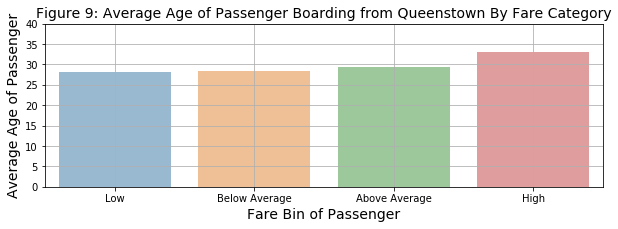

In [40]:
plt.figure(figsize=(10,3))
sns.barplot(queenstown(df)[0], queenstown(df)[1], alpha = 0.5)
plt.ylabel('Average Age of Passenger', fontsize = 14)
plt.xlabel('Fare Bin of Passenger', fontsize = 14)
plt.title('Figure 9: Average Age of Passenger Boarding from Queenstown By Fare Category', fontsize = 14)
plt.ylim(0, 40, 5)
plt.grid(True)
plt.show()

In [41]:
def southampton(df):
    df_southampton = df[df['Embarked'] == 'Southampton']
    df_southampton_gb = df_southampton[['Age', 'FareCategories']].groupby(['FareCategories'], as_index=False).mean() 
    return df_southampton_gb['FareCategories'].tolist(), df_southampton_gb['Age'].tolist()

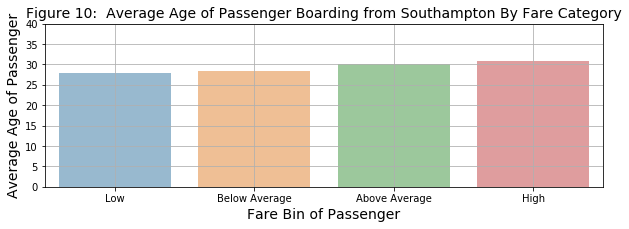

In [42]:
plt.figure(figsize=(10,3))
sns.barplot(x = southampton(df)[0], y = southampton(df)[1], alpha = 0.5)
plt.grid(True)
plt.ylim(0, 40, 5)
plt.ylabel('Average Age of Passenger', fontsize = 14)
plt.xlabel('Fare Bin of Passenger', fontsize = 14)
plt.title('Figure 10:  Average Age of Passenger Boarding from Southampton By Fare Category', fontsize = 14)
plt.show()

In [43]:
def cherbourg(df):
    df_cherbourg = df[df['Embarked'] == 'Cherbourg']
    df_cherbourg_gb = df_cherbourg[['Age', 'FareCategories']].groupby(['FareCategories'], as_index=False).mean() 
    return df_cherbourg_gb['FareCategories'].tolist(), df_cherbourg_gb['Age'].tolist()

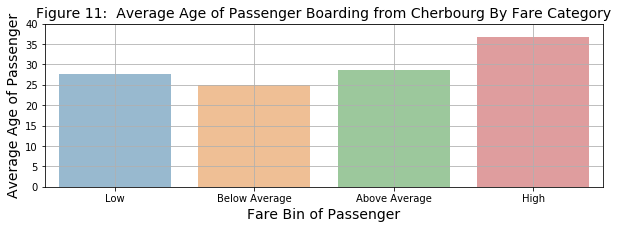

In [44]:
plt.figure(figsize=(10,3))
sns.barplot(cherbourg(df)[0], cherbourg(df)[1], alpha = 0.5)
plt.ylabel('Average Age of Passenger', fontsize = 14)
plt.ylim(0, 40, 5)
plt.xlabel('Fare Bin of Passenger', fontsize = 14)
plt.title('Figure 11:  Average Age of Passenger Boarding from Cherbourg By Fare Category', fontsize = 14)
plt.grid(True)
plt.show()

In [45]:
df['Age'].describe()

count    1309.000000
mean       29.881138
std        12.883193
min         0.170000
25%        22.000000
50%        29.881138
75%        35.000000
max        80.000000
Name: Age, dtype: float64

In [46]:
bins = [0.17, 22.00, 29.88, 35.00, 80.00]
group_names = ['Low', 'Below Average', 'Above Average', 'High']

In [47]:
df['AgeCategories'] = pd.cut(df['Age'], bins, labels=group_names)

In [48]:
df.head(3)

,Age,Cabin,Embarked,Fare,Name,Parch,PassengerId,Pclass,Sex,SibSp,Survived,Ticket,Travel_w_ Parents,Travel_w_ Siblings,FareCategories,AgeCategories
0,34.5,NaN,Queenstown,7.8292,"Kelly, Mr. James",0,892,3,male,0,0,330911,Traveling Without Parents,Traveling Without Siblings,Low,Above Average
1,47.0,NaN,Southampton,7.0000,"Wilkes, Mrs. James (Ellen Needs)",0,893,3,female,1,1,363272,Traveling Without Parents,Traveling With Siblings,Low,High
2,62.0,NaN,Queenstown,9.6875,"Myles, Mr. Thomas Francis",0,894,2,male,0,0,240276,Traveling Without Parents,Traveling Without Siblings,Below Average,High


### What is the relationship between people who survived and where the embarked onto the ship? Is there one city that has a higher percentage of survivors than others?

In [49]:
survival_city_gb = df[['Embarked', 'Survived']].groupby(['Embarked'], as_index = False).mean()
survival_city_gb

,Embarked,Survived
0,Cherbourg,0.492593
1,Queenstown,0.439024
2,Southampton,0.335153


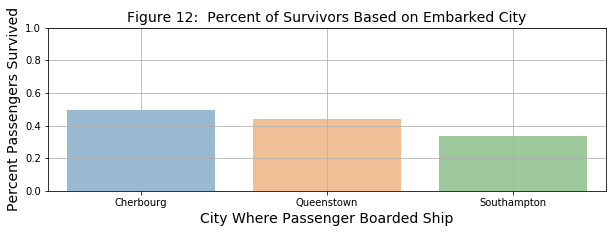

In [50]:
plt.figure(figsize=(10, 3))
sns.barplot(survival_city_gb['Embarked'].tolist(), survival_city_gb['Survived'].tolist(), alpha = 0.5)
plt.ylabel('Percent Passengers Survived', fontsize = 14)
plt.xlabel('City Where Passenger Boarded Ship', fontsize = 14)
plt.title('Figure 12:  Percent of Survivors Based on Embarked City', fontsize = 14)
plt.ylim(0, 1, 0.1)
plt.grid(True)
plt.show()

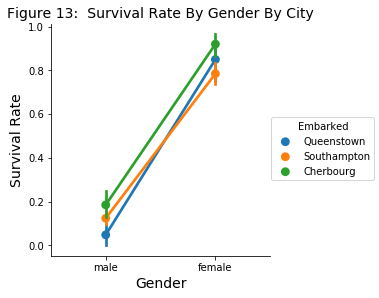

In [51]:
plt.figure(figsize = (10, 9))
sns.factorplot(x = 'Sex', y = 'Survived', hue = 'Embarked', data = df, alpha = 0.5)
plt.xlabel('Gender', fontsize = 14)
plt.ylabel('Survival Rate', fontsize = 14)
plt.title('Figure 13:  Survival Rate By Gender By City', fontsize = 14)
plt.show()

### What is the relationship between people who survived and their passenger class on the ship? Did more first-class passengers survive over the second- and third-class passengers?

In [52]:
survival_class_gb = df[['Survived', 'Pclass']].groupby(['Pclass'], as_index=False).mean()
survival_class_gb

,Pclass,Survived
0,1,0.575851
1,2,0.422383
2,3,0.269394


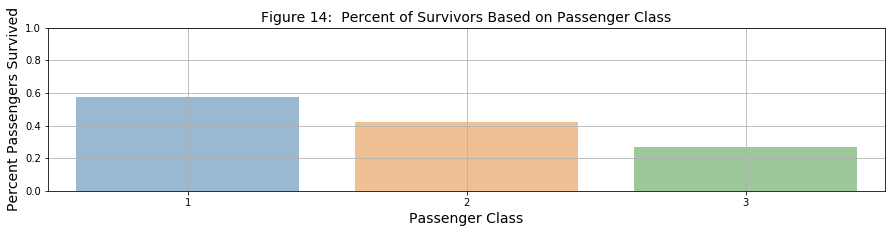

In [53]:
plt.figure(figsize=(15, 3))
sns.barplot(survival_class_gb['Pclass'], survival_class_gb['Survived'], alpha = 0.5)
plt.ylim(0, 1, 0.1)
plt.grid(True)
plt.ylabel('Percent Passengers Survived', fontsize = 14)
plt.xlabel('Passenger Class', fontsize = 14)
plt.title('Figure 14:  Percent of Survivors Based on Passenger Class', fontsize = 14)
plt.show()

### What is the relationship between the gender of the passengers and their survival rate? Did more females survive compared to males?

In [54]:
survival_sex_gb = df[['Survived', 'Sex']].groupby(['Sex'], as_index = False).mean()
survival_sex_gb

,Sex,Survived
0,female,0.82618
1,male,0.12930


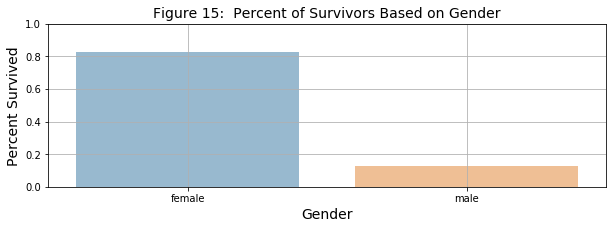

In [55]:
plt.figure(figsize=(10, 3))
sns.barplot(survival_sex_gb['Sex'].tolist(), survival_sex_gb['Survived'].tolist(), alpha = 0.5)
plt.ylim(0, 1, 0.1)
plt.grid(True)
plt.ylabel('Percent Survived', fontsize = 14)
plt.xlabel('Gender', fontsize = 14)
plt.title('Figure 15:  Percent of Survivors Based on Gender', fontsize = 14)
plt.show()

### Is there a relationship between the gender and the passenger class on the ship? For example, did more females from first-class survive as opposed to, males from third-class?

In [56]:
df_thrid_class = df[df['Pclass'] == 3]

In [57]:
df_thrid_class[['Survived', 'Sex']].groupby(['Sex'], as_index = False).mean()

,Sex,Survived
0,female,0.666667
1,male,0.095335


In [58]:
df_second_class = df[df['Pclass'] == 2]

In [59]:
df_second_class[['Survived', 'Sex']].groupby(['Sex'], as_index = False).mean()

,Sex,Survived
0,female,0.943396
1,male,0.099415


In [60]:
df_first_class = df[df['Pclass'] == 1]

In [61]:
df_first_class[['Survived', 'Sex']].groupby(['Sex'], as_index = False).mean()

,Sex,Survived
0,female,0.979167
1,male,0.251397


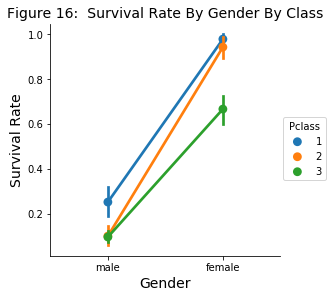

In [62]:
plt.figure(figsize = (10, 9))
sns.factorplot(x = 'Sex', y = 'Survived', hue = 'Pclass', data = df)
plt.xlabel('Gender', fontsize = 14)
plt.ylabel('Survival Rate', fontsize = 14)
plt.title('Figure 16:  Survival Rate By Gender By Class', fontsize = 14)
plt.show()

### How did age play a role in the survival rate of the passengers? Were passengers that were younger than 30 have a higher rate of survival than those that were 30 and older?

In [63]:
def older_30(c):
    df_older_30 = c[c['Age'] >= 30]
    df_older_30_gb = df_older_30[['Survived', 'Sex']].groupby(['Sex'], as_index = False).mean()
    df_young_30 = c[df['Age'] < 30]
    df_young_30_gb = df_young_30[['Survived', 'Sex']].groupby(['Sex'], as_index = False).mean()

    return df_older_30_gb['Sex'].tolist(), df_older_30_gb['Survived'].tolist(), df_young_30_gb['Sex'].tolist(), df_young_30_gb['Survived'].tolist()

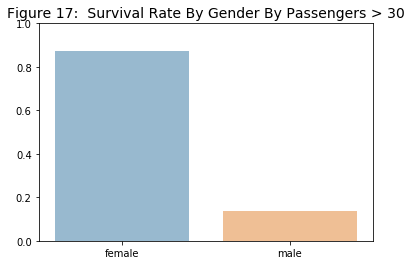

In [64]:
sns.barplot(x = older_30(df)[0], y = older_30(df)[1], alpha = 0.5)
plt.ylim(0, 1, 0.2)
plt.title('Figure 17:  Survival Rate By Gender By Passengers > 30', fontsize = 14)
plt.show()

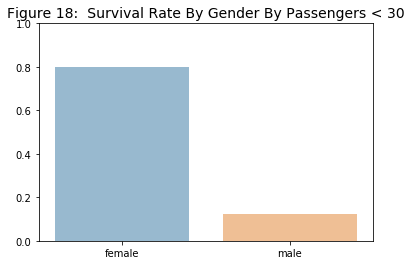

In [65]:
sns.barplot(x = older_30(df)[2], y = older_30(df)[3], alpha = 0.5)
plt.ylim(0, 1, 0.2)
plt.title('Figure 18:  Survival Rate By Gender By Passengers < 30', fontsize = 14)
plt.show()

+ Was traveling alone the best predictor if you survived the titanic sinking? 
+ Specifically, did having a sibling or spouse reduce your changes of surviving the sinking? 
+ Was traveling without your parents or children an indicator of a higher rate of survival?

In [66]:
travel_siblings_df = df[['Travel_w_ Siblings', "Survived"]].groupby(['Travel_w_ Siblings'],as_index=False).mean()
travel_siblings_df

,Travel_w_ Siblings,Survived
0,Traveling With Siblings,0.468900
1,Traveling Without Siblings,0.334456


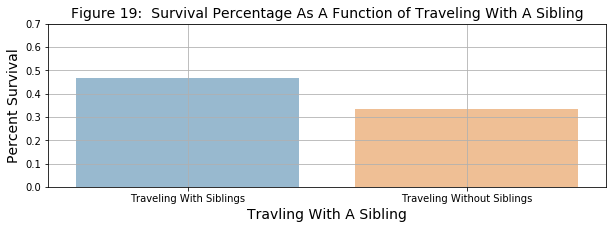

In [67]:
plt.figure(figsize = (10, 3))
sns.barplot(travel_siblings_df['Travel_w_ Siblings'], travel_siblings_df['Survived'], alpha = 0.5)
plt.xlabel('Travling With A Sibling', fontsize = 14)
plt.ylabel('Percent Survival', fontsize = 14)
plt.grid(True)
plt.ylim(0, 0.7, 0.1)
plt.title('Figure 19:  Survival Percentage As A Function of Traveling With A Sibling', fontsize = 14)
plt.show()

In [68]:
travel_parents_df = df[['Travel_w_ Parents', "Survived"]].groupby(['Travel_w_ Parents'],as_index=False).mean()
travel_parents_df

,Travel_w_ Parents,Survived
0,Traveling With Parents,0.527687
1,Traveling Without Parents,0.331337


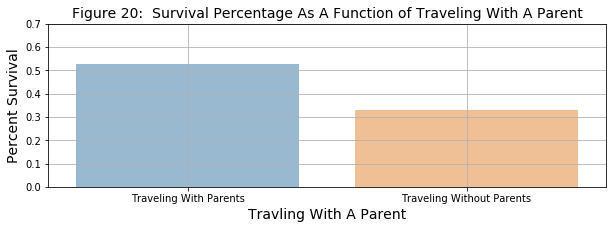

In [69]:
plt.figure(figsize = (10, 3))
sns.barplot(travel_parents_df['Travel_w_ Parents'], travel_parents_df['Survived'], alpha = 0.5)
plt.xlabel('Travling With A Parent', fontsize = 14)
plt.ylabel('Percent Survival', fontsize = 14)
plt.grid(True)
plt.ylim(0, 0.7, 0.1)
plt.title('Figure 20:  Survival Percentage As A Function of Traveling With A Parent', fontsize = 14)
plt.show()

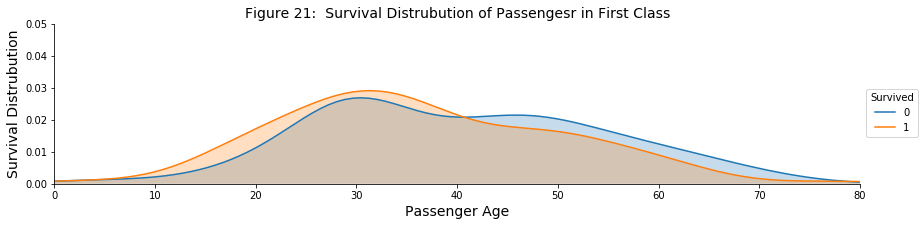

In [70]:
df_class_1 = df[df['Pclass'] == 1]
facet = sns.FacetGrid(df_class_1, hue="Survived",aspect=4)
facet.map(sns.kdeplot,'Age',shade= True)
facet.set(xlim=(0, df_class_1['Age'].max()))
facet.add_legend()
plt.ylim(0, 0.05, 0.005)
plt.xlabel('Passenger Age', fontsize =14)
plt.ylabel('Survival Distrubution', fontsize = 14)
plt.title('Figure 21:  Survival Distrubution of Passengesr in First Class', fontsize = 14)
plt.show()

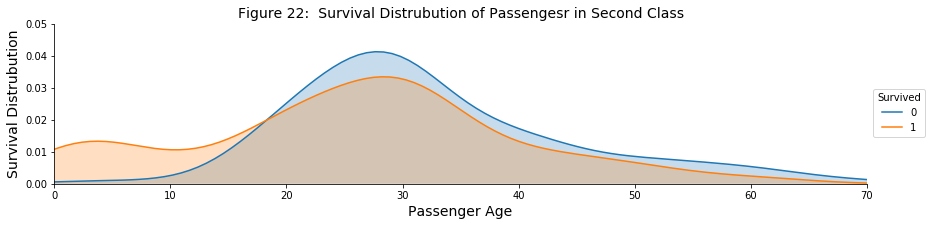

In [71]:
df_class_2 = df[df['Pclass'] == 2]
facet = sns.FacetGrid(df_class_2, hue="Survived",aspect=4)
facet.map(sns.kdeplot,'Age',shade= True)
facet.set(xlim=(0, df_class_2['Age'].max()))
facet.add_legend()
plt.ylim(0, 0.05, 0.005)
plt.xlabel('Passenger Age', fontsize =14)
plt.ylabel('Survival Distrubution', fontsize = 14)
plt.title('Figure 22:  Survival Distrubution of Passengesr in Second Class', fontsize = 14)
plt.show()

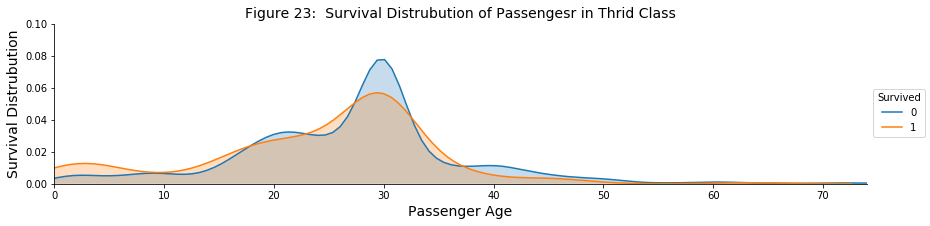

In [72]:
df_class_3 = df[df['Pclass'] == 3]
facet = sns.FacetGrid(df_class_3, hue="Survived",aspect=4)
facet.map(sns.kdeplot,'Age',shade= True)
facet.set(xlim=(0, df_class_3['Age'].max()))
facet.add_legend()
plt.ylim(0, 0.1, 0.005)
plt.xlabel('Passenger Age', fontsize =14)
plt.ylabel('Survival Distrubution', fontsize = 14)
plt.title('Figure 23:  Survival Distrubution of Passengesr in Thrid Class', fontsize = 14)
plt.show()

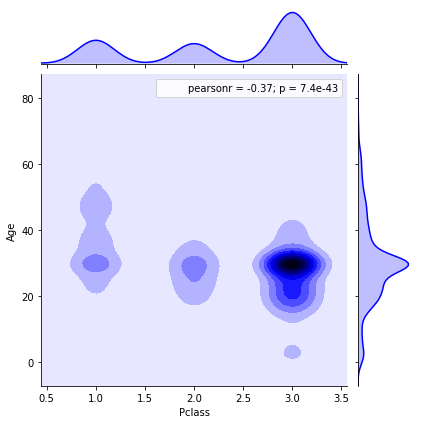

In [73]:
plt.figure(figsize = (10, 10))
sns.jointplot(x=df["Pclass"], y=df["Age"], kind='kde', color = 'b')
plt.show()

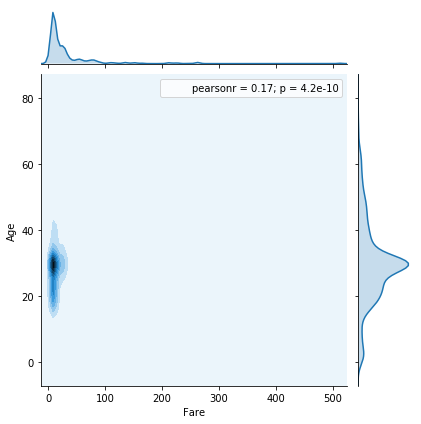

In [75]:
plt.figure(figsize = (10, 10))
sns.jointplot(x=df["Fare"], y=df["Age"], kind='kde')
plt.show()